# Zmiana populacji w powiatach na przestrzeni lat

In [1]:
import pandas as pd
import numpy as np
import re
import geopandas as gpd


PATH = "gminy.csv"
df = pd.read_csv(PATH, sep=';', decimal=',')
df
indexes = df[df.Rok == 2001].index
df.drop(indexes, inplace=True)
df

C:\Users\kierz\anaconda3\envs\pandasu\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Kategoria,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
0,Ludność,0,POLSKA,ludność na 1 km2,2002,122.0,osoba,NaN,NaN
1,Ludność,0,POLSKA,ludność na 1 km2,2003,122.0,osoba,NaN,NaN
2,Ludność,0,POLSKA,ludność na 1 km2,2004,122.0,osoba,NaN,NaN
3,Ludność,0,POLSKA,ludność na 1 km2,2005,122.0,osoba,NaN,NaN
4,Ludność,0,POLSKA,ludność na 1 km2,2006,122.0,osoba,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1971426,Wydatki per capita,3263011,Świnoujście (1),wydatki majątkowe,2016,1114.0,zł,NaN,NaN
1971427,Wydatki per capita,3263011,Świnoujście (1),wydatki majątkowe,2017,1024.0,zł,NaN,NaN
1971428,Wydatki per capita,3263011,Świnoujście (1),wydatki majątkowe,2018,3206.0,zł,NaN,NaN
1971429,Wydatki per capita,3263011,Świnoujście (1),wydatki majątkowe,2019,5256.0,zł,NaN,NaN


In [42]:
powiaty = []
kod_all_units = df[(df.Kod > 200000) & (df.Kod < 3300000) & (df.Kategoria == "Ludność wg grup wieku") & (df.Zmienna == "ogółem")].Kod
kod_all_units = kod_all_units.apply(str)
for k in kod_all_units:
    if k[-5:] != "00000" and k[-3:] == "000":
        powiaty.append(float(k))
powiaty=list(set(powiaty))
powiaty.sort()
powiaty

[201000.0,
 202000.0,
 203000.0,
 204000.0,
 205000.0,
 206000.0,
 207000.0,
 208000.0,
 209000.0,
 210000.0,
 211000.0,
 212000.0,
 213000.0,
 214000.0,
 215000.0,
 216000.0,
 217000.0,
 218000.0,
 219000.0,
 220000.0,
 221000.0,
 222000.0,
 223000.0,
 224000.0,
 225000.0,
 226000.0,
 261000.0,
 262000.0,
 264000.0,
 265000.0,
 401000.0,
 402000.0,
 403000.0,
 404000.0,
 405000.0,
 406000.0,
 407000.0,
 408000.0,
 409000.0,
 410000.0,
 411000.0,
 412000.0,
 413000.0,
 414000.0,
 415000.0,
 416000.0,
 417000.0,
 418000.0,
 419000.0,
 461000.0,
 462000.0,
 463000.0,
 464000.0,
 601000.0,
 602000.0,
 603000.0,
 604000.0,
 605000.0,
 606000.0,
 607000.0,
 608000.0,
 609000.0,
 610000.0,
 611000.0,
 612000.0,
 613000.0,
 614000.0,
 615000.0,
 616000.0,
 617000.0,
 618000.0,
 619000.0,
 620000.0,
 661000.0,
 662000.0,
 663000.0,
 664000.0,
 801000.0,
 802000.0,
 803000.0,
 804000.0,
 805000.0,
 806000.0,
 807000.0,
 808000.0,
 809000.0,
 810000.0,
 811000.0,
 812000.0,
 861000.0,
 862000.0,

In [43]:
average_growth_rate_per_area = []
lata_badan_powiat = df[(df.Kategoria=="Ludność wg grup wieku") & (df.Zmienna == "ogółem") & (df.Nazwa=="Powiat legionowski")].Rok.unique()
for kod in powiaty:
    average_growth_rate_per_area.append(1/len(lata_badan_powiat)*np.log((df[(df.Kategoria=="Ludność wg grup wieku") & (df.Zmienna == "ogółem") & (df.Kod== kod) & (df.Rok == lata_badan_powiat[-1])].Wartosc.values[0])/(df[(df.Kategoria=="Ludność wg grup wieku") & (df.Zmienna == "ogółem") & (df.Kod== kod) & (df.Rok == lata_badan_powiat[0])].Wartosc.values[0])))
for x in range (0,len(average_growth_rate_per_area)):
    average_growth_rate_per_area[x] *= 100

In [45]:
average_growth_rate_per_area


[0.0907278857423362,
 -0.3281145493778273,
 0.04597988383845512,
 -0.34474261020812824,
 -0.30280691998417375,
 -0.0718149113316409,
 -0.5156379926308582,
 -0.4364530814720817,
 0.21667521781080487,
 -0.37109330713019945,
 -0.01310013612812261,
 -0.3429992513624482,
 -0.019440583704465185,
 0.2113420001342473,
 0.4368799352643802,
 0.17350066057421668,
 -0.17099650520756604,
 0.6954241908342027,
 -0.18621330809710523,
 0.5896401512994796,
 -6.824347538002885,
 -0.12803909959128382,
 2.5923557027638653,
 -0.4949513635472527,
 -0.443492160494542,
 -0.36904170459321034,
 -0.648492231388386,
 -0.438739492096459,
 0.03803655306807375,
 nan,
 -0.043752696036526345,
 0.3023696347113722,
 1.5717872791457508,
 0.02295486982398956,
 -0.033094607388550606,
 0.27869103739114004,
 -0.2690932250962261,
 -0.07537130440552038,
 -0.19856451096112926,
 0.11504350776845788,
 -0.3497785380903805,
 -0.13446361908753174,
 -0.005168591659647084,
 0.0838763696988454,
 1.385459303901565,
 0.1425355901259689,
 

In [46]:
df2 = pd.DataFrame()
df2['Kod'] = powiaty
df2['średni wzrost'] = average_growth_rate_per_area
df2.Kod = df2.Kod/1000
df2

,Kod,średni wzrost
0,201000.0,0.090728
1,202000.0,-0.328115
2,203000.0,0.045980
3,204000.0,-0.344743
4,205000.0,-0.302807
...,...,...
375,3217000.0,-0.245465
376,3218000.0,-0.311902
377,3261000.0,-0.085211
378,3262000.0,-0.215838


In [51]:
df_powiaty = gpd.read_file("Powiaty.shp")
df_powiaty["JPT_KOD_JE"] = df_powiaty["JPT_KOD_JE"].astype(float)
df_powiaty = df_powiaty[["JPT_KOD_JE", "geometry"]]

dane_mapa_powiat = pd.merge(df_powiaty, df2, how='left', left_on='JPT_KOD_JE', right_on="Kod")

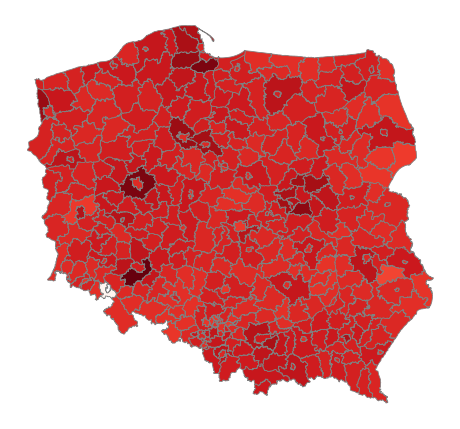

In [52]:
fig, ax = plt2.subplots(1, figsize = (8,8))
dane_mapa_powiat.plot(column='średni wzrost', ax=ax, cmap='Reds', linewidth=0.8, edgecolor='gray')
ax.axis('off')
plt2.show()